## clusters 1 kmeans

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [2]:
df = pd.read_csv('../data/Global_Superstore_clustering.csv', encoding='ISO-8859-1', index_col=0)
df.head(2)

df = df[df["clusters_kmeans"] == 1]
print(df.shape[0])
df = df.drop(columns=["clusters_kmeans","clusters_agglomerative"])
df.columns

13799


Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Sales_respuesta'],
      dtype='object')

In [3]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(3)

d:\develop\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,Real,Predicho,Conjunto,Modelo,Residuos
17142,248.85,283.70,Train,tree,-34.85
7617,342.51,321.14,Test,tree,21.37
34067,47.62,61.62,Test,tree,-14.00


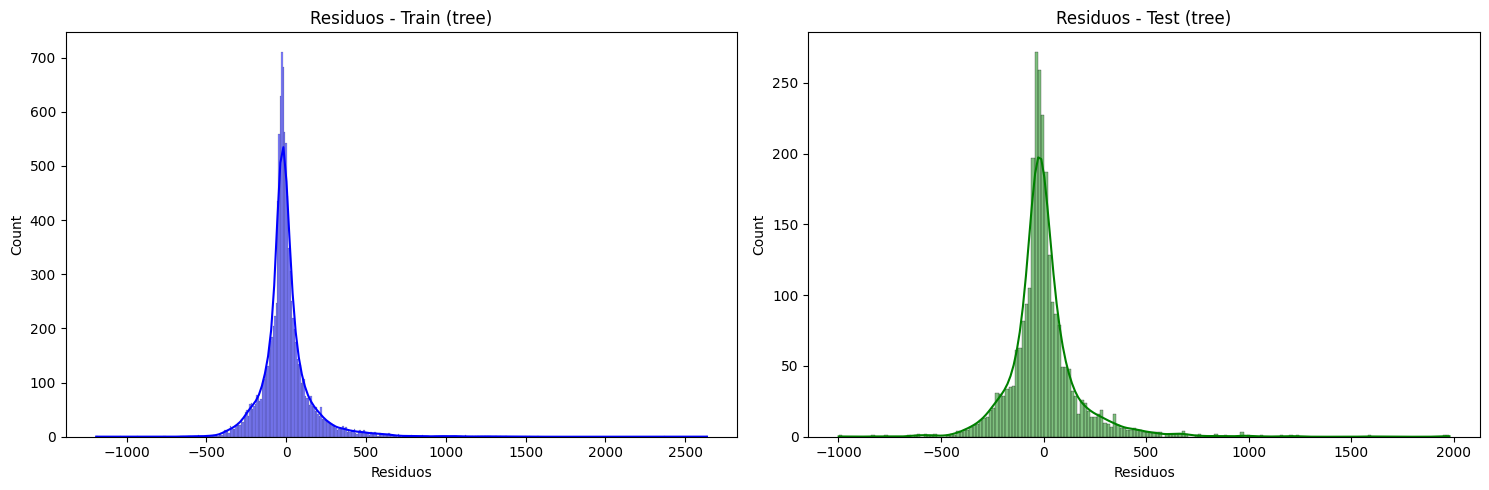

In [4]:
analisis.plot_residuos("tree")

In [5]:
analisis.calcular_metricas("tree")

,train,test
R2,0.78,0.75
MAE,98.74,107.24
MSE,"27,586.68","32,042.60"
RMSE,166.09,179.00


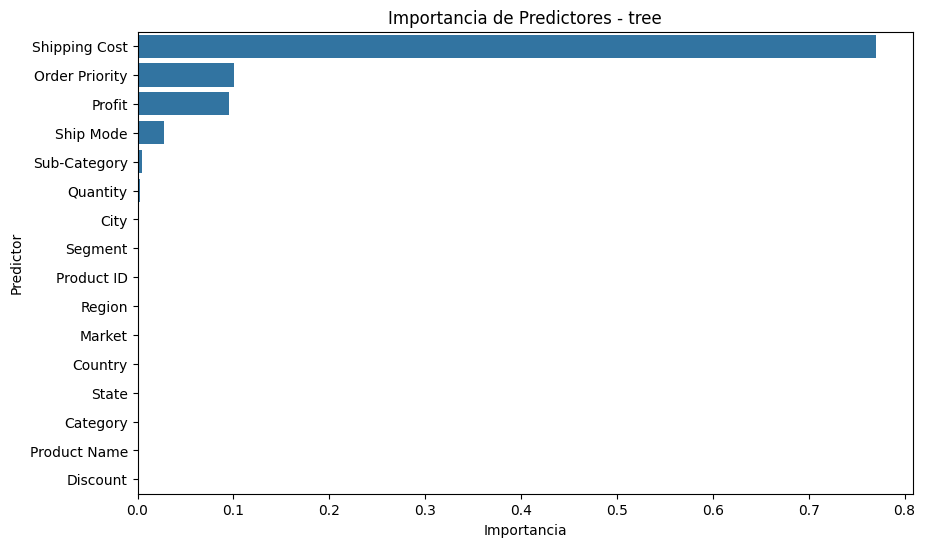

,Predictor,Importancia
14,Shipping Cost,0.77
15,Order Priority,0.10
13,Profit,0.10
0,Ship Mode,0.03
9,Sub-Category,0.00
11,Quantity,0.00
2,City,0.00
1,Segment,0.00
7,Product ID,0.00
6,Region,0.00


In [6]:
analisis.importancia_predictores("tree")

In [7]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_rf = {
    'n_estimators': [150],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [4], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', scoring="neg_mean_squared_error", param_grid=params_rf)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
24058,225.99,145.32,Train,random_forest,80.67
3722,780.30,837.74,Train,random_forest,-57.44
14951,327.84,344.12,Train,random_forest,-16.28


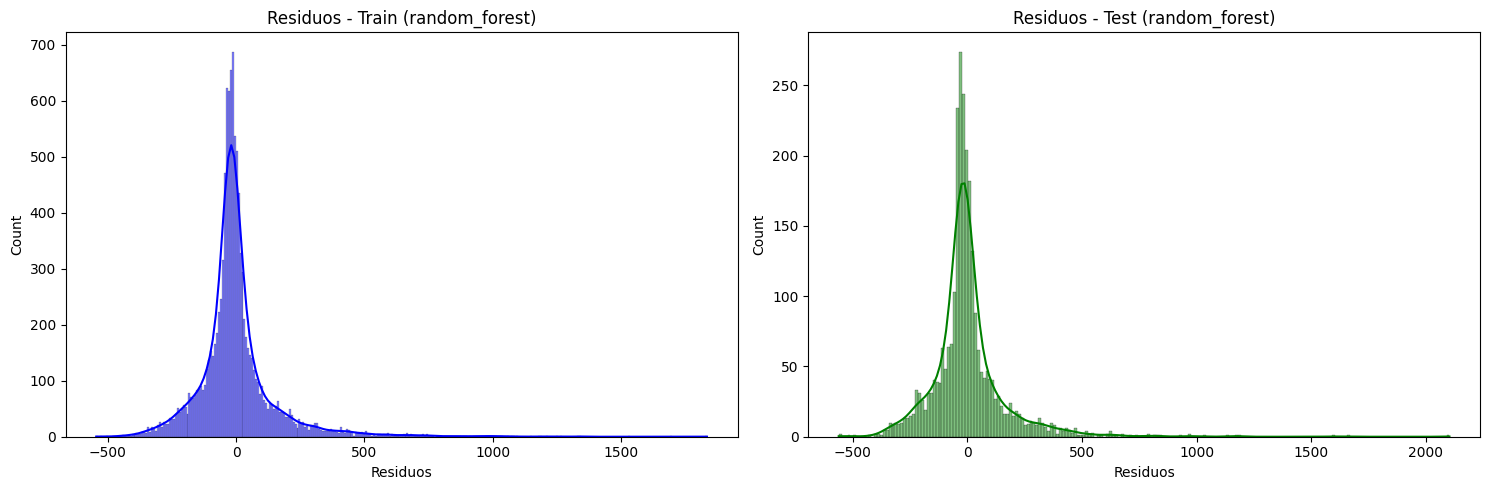

In [8]:
analisis_random_forest.plot_residuos("random_forest")

In [9]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.81,0.78
MAE,92.41,99.45
MSE,"24,180.58","27,843.56"
RMSE,155.50,166.86


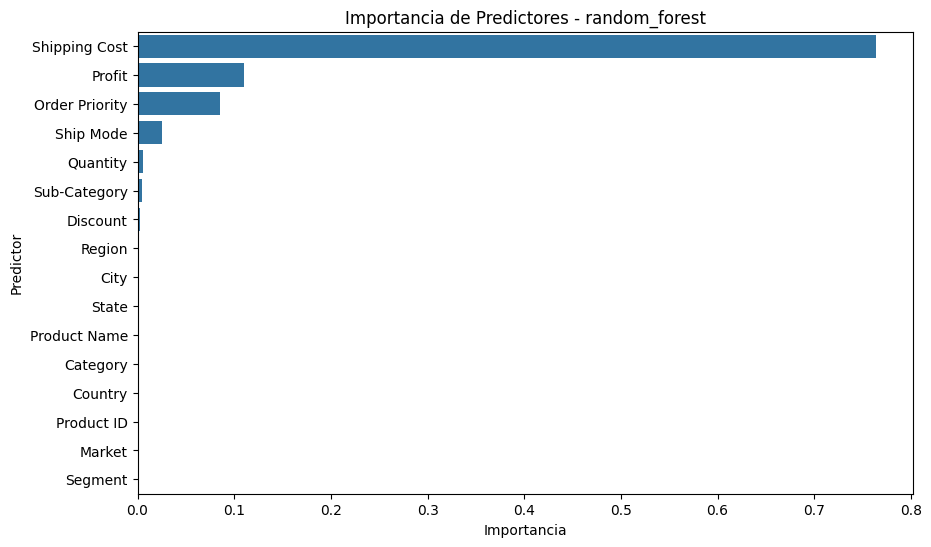

,Predictor,Importancia
14,Shipping Cost,0.76
13,Profit,0.11
15,Order Priority,0.08
0,Ship Mode,0.03
11,Quantity,0.01
9,Sub-Category,0.00
12,Discount,0.00
6,Region,0.00
2,City,0.00
3,State,0.00


In [10]:
analisis_random_forest.importancia_predictores("random_forest")

In [11]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_gb = {
    'n_estimators': [150],
    'learning_rate': [0.01],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
24058,225.99,166.09,Train,gradient_boosting,59.90
3722,780.30,694.64,Train,gradient_boosting,85.66
14951,327.84,378.37,Train,gradient_boosting,-50.53


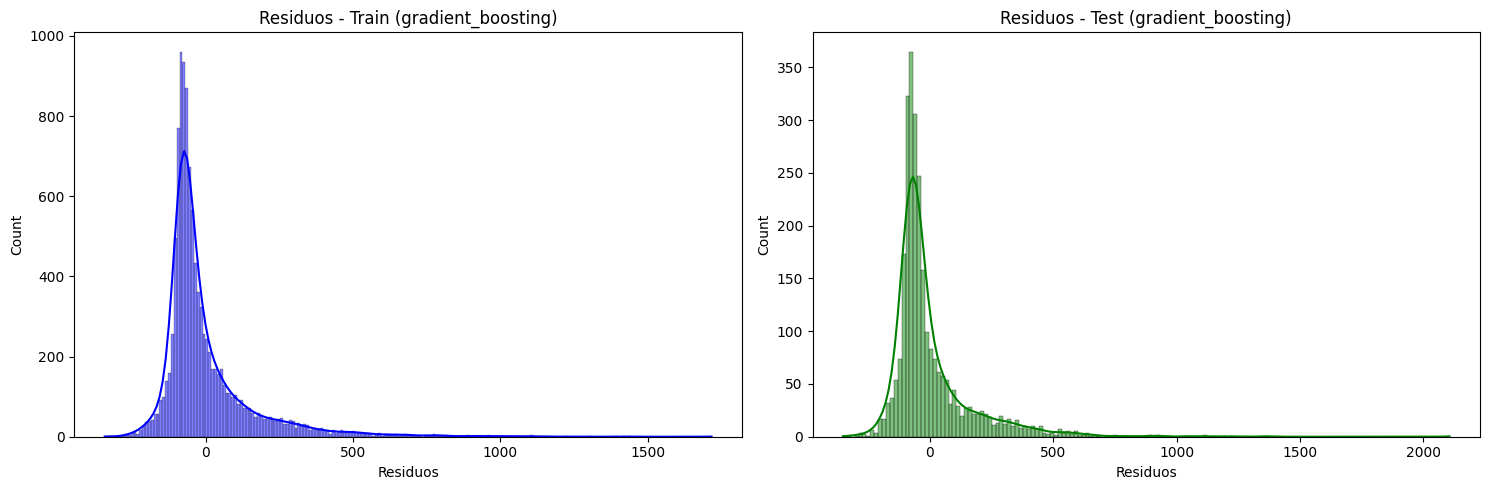

In [12]:
analisis_gradient_boosting.plot_residuos("gradient_boosting")

In [13]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.80,0.77
MAE,104.78,109.91
MSE,"25,709.43","28,931.56"
RMSE,160.34,170.09


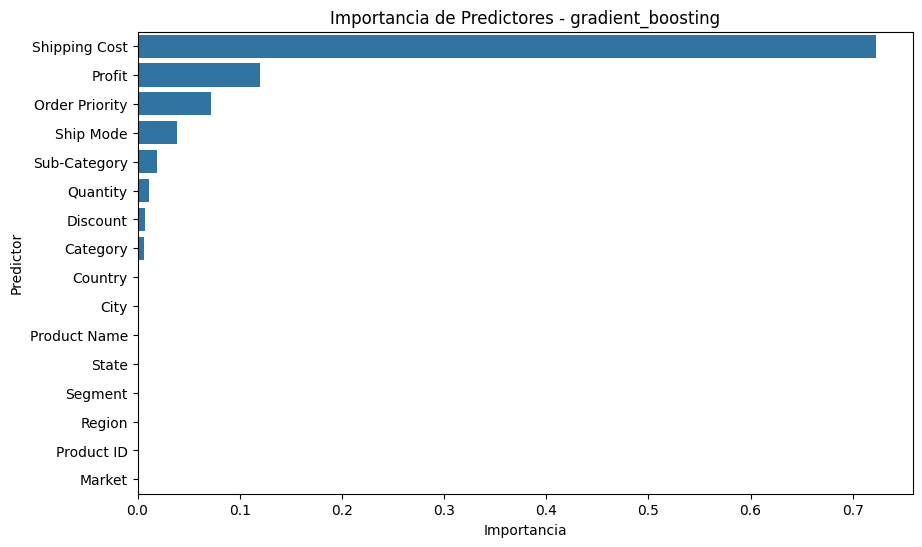

,Predictor,Importancia
14,Shipping Cost,0.72
13,Profit,0.12
15,Order Priority,0.07
0,Ship Mode,0.04
9,Sub-Category,0.02
11,Quantity,0.01
12,Discount,0.01
8,Category,0.01
4,Country,0.00
2,City,0.00


In [14]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")

In [15]:
# instanciamos la clase de regresión lineal
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Sales_respuesta')

params_xgb = {
    'n_estimators': [150],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_child_weight': [1, 2, 4],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}


# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost',param_grid=params_xgb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
24058,225.99,153.31,Train,xgboost,72.68
3722,780.30,724.14,Train,xgboost,56.16
14951,327.84,378.87,Train,xgboost,-51.03


In [16]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.72,0.71
MAE,121.02,123.80
MSE,"35,630.61","36,374.62"
RMSE,188.76,190.72


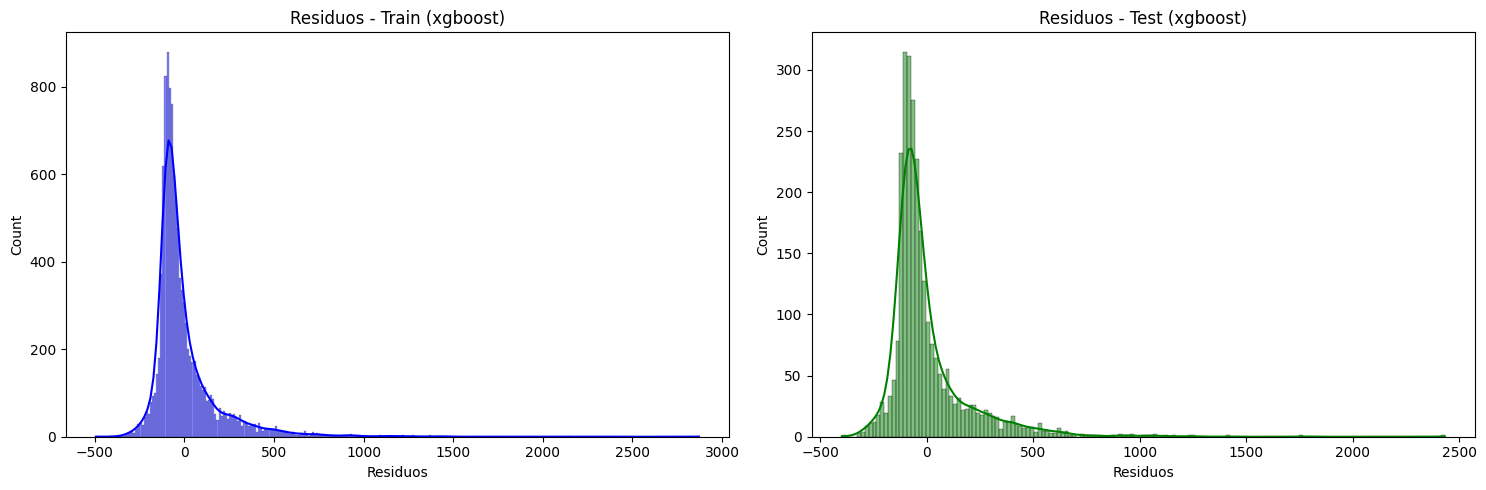

In [17]:
analisis_xgboost.plot_residuos("xgboost")

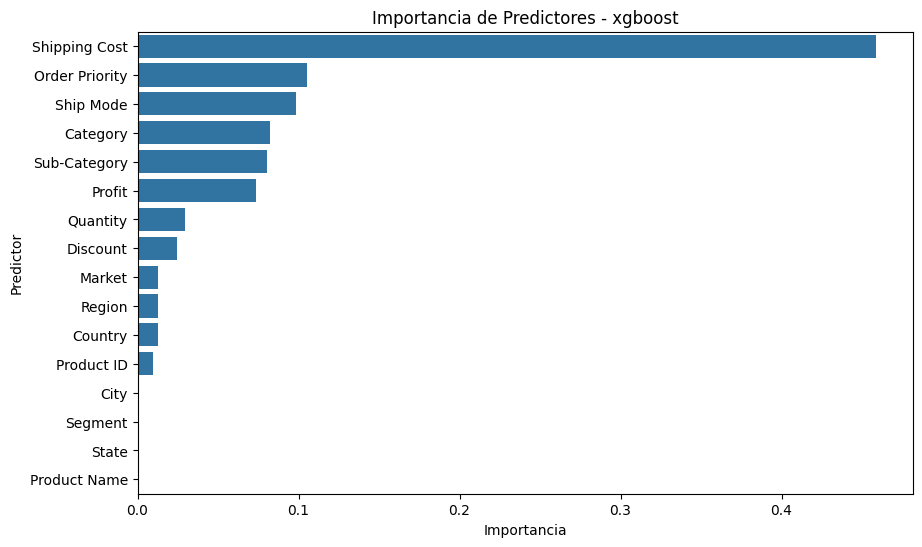

,Predictor,Importancia
14,Shipping Cost,0.46
15,Order Priority,0.11
0,Ship Mode,0.10
8,Category,0.08
9,Sub-Category,0.08
13,Profit,0.07
11,Quantity,0.03
12,Discount,0.02
5,Market,0.01
6,Region,0.01


In [18]:
analisis_xgboost.importancia_predictores("xgboost")

In [19]:
analisis.calcular_metricas("tree")

,train,test
R2,0.78,0.75
MAE,98.74,107.24
MSE,"27,586.68","32,042.60"
RMSE,166.09,179.00


In [20]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.72,0.71
MAE,121.02,123.80
MSE,"35,630.61","36,374.62"
RMSE,188.76,190.72


In [21]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.80,0.77
MAE,104.78,109.91
MSE,"25,709.43","28,931.56"
RMSE,160.34,170.09


In [22]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.81,0.78
MAE,92.41,99.45
MSE,"24,180.58","27,843.56"
RMSE,155.50,166.86


In [23]:
analisis_random_forest.obtener_resultados().head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
24058,225.99,145.32,Train,random_forest,80.67
3722,780.30,837.74,Train,random_forest,-57.44
14951,327.84,344.12,Train,random_forest,-16.28
